<a href="https://colab.research.google.com/github/sleepy5300/TensorFlow-in-Practice-Specialization/blob/master/Copy_of_Course_3_Week_4_Exercise_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
gitfrom tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras.regularizers import l2
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [0]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

print(max_sequence_len)

--2019-10-03 02:09:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 2a00:1450:400c:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-10-03 02:09:17 (146 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]

11


In [0]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(int(total_words/16), return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(int(total_words/8))))
model.add(Dense(total_words / 2, activation='relu', kernel_regularizer=l2(l=0.05)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 10, 400)           481600    
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 400)           0         
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 802)               2572816   
_________________________________________________________________
dense_8 (Dense)              (None, 1605)              1288815   
_________________________________________________________________
dense_9 (Dense)              (None, 3211)              5156866   
Total params: 9,821,197
Trainable params: 9,821,197
Non-trainable params: 0
____________________________________________

In [0]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
15462/15462 [==============================] - 56s 4ms/sample - loss: 8.4046 - acc: 0.0217
Epoch 2/100
15462/15462 [==============================] - 53s 3ms/sample - loss: 6.5407 - acc: 0.0221
Epoch 3/100
15462/15462 [==============================] - 53s 3ms/sample - loss: 6.4517 - acc: 0.0226
Epoch 4/100
15462/15462 [==============================] - 53s 3ms/sample - loss: 6.3873 - acc: 0.0288
Epoch 5/100
15462/15462 [==============================] - 53s 3ms/sample - loss: 6.2989 - acc: 0.0330
Epoch 6/100
15462/15462 [==============================] - 53s 3ms/sample - loss: 6.2011 - acc: 0.0352
Epoch 7/100
15462/15462 [==============================] - 53s 3ms/sample - loss: 6.1349 - acc: 0.0383
Epoch 8/100
15462/15462 [==============================] - 53s 3ms/sample - loss: 6.0678 - acc: 0.0433
Epoch 9/100
15462/15462 [==============================] - 53s 3ms/sample - loss: 

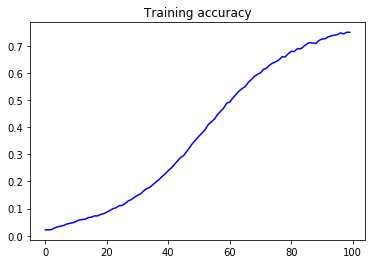

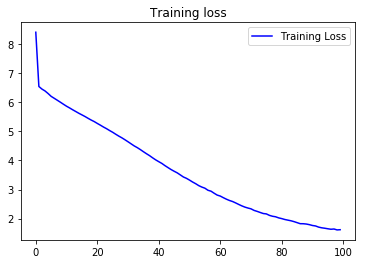

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope must come forsworn to use one of state or dross light erred rare 'will ' hour mine eye ' than advised beds' asleep and fuel tuned and near sorrow ' are prove care i fire chide love's might held near age ' grossly might end prove cross gone ' than give men's age before thee than change mine eye ' prove care my name forbear truth open part prove care prove crime delight might rare burn which delight than lie and heaven's rhyme near slain prove cross prove life and date jewel might lie are prove thee thine eye and
